# EJERCICIOS EN COMPUTADORA

## Problema 1

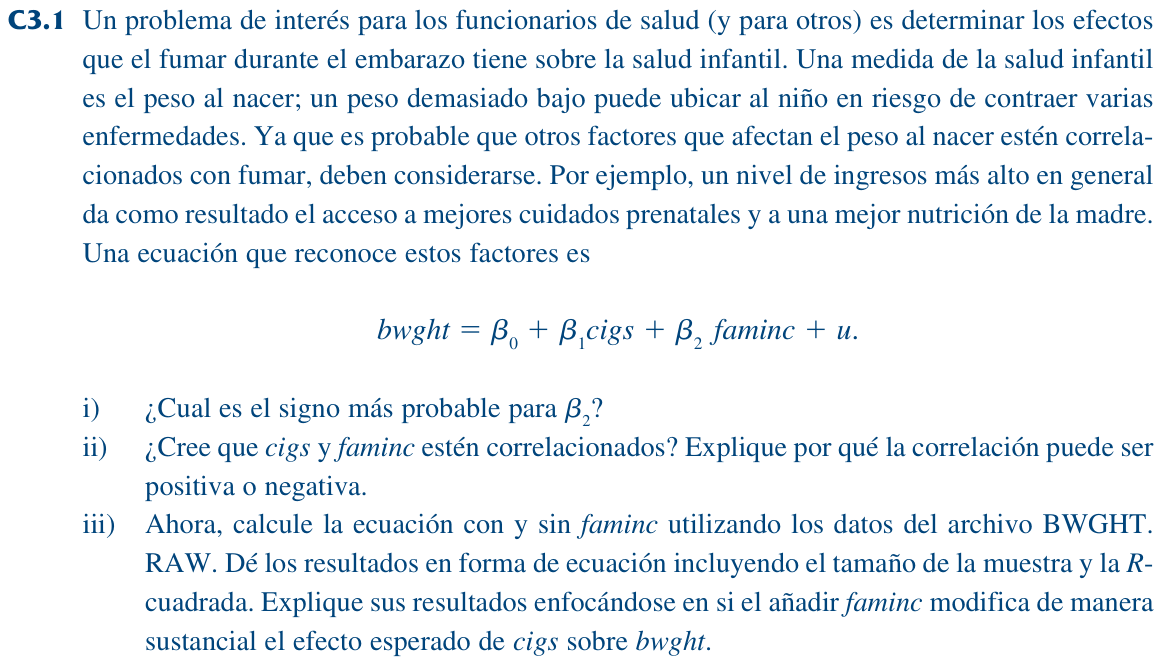

In [ ]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wooldridge import data
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [ ]:
# Cargar los datos del paquete wooldridge
data_bwght = data('bwght')
data_bwght.head()

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,13.5,16.5,122.300003,109,12.0,12.0,1,1,1,0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.300003,133,6.0,12.0,2,1,0,0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.300003,129,NaN,12.0,2,0,0,0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.300003,126,12.0,12.0,2,1,0,0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.300003,134,14.0,12.0,2,1,1,0,4.897840,8.3750,0.0,3.314186


### Parte I

In [ ]:
# Parte i: ¿Cuál es el signo más probable para b2?
# Respuesta:
# El signo más probable para b2 es positivo porque un mayor ingreso familiar (faminc)
# se asocia con un mejor nivel de nutricion.

In [ ]:
data_bwght[['faminc','bwght']].corr()

,faminc,bwght
faminc,1.000000,0.108937
bwght,0.108937,1.000000


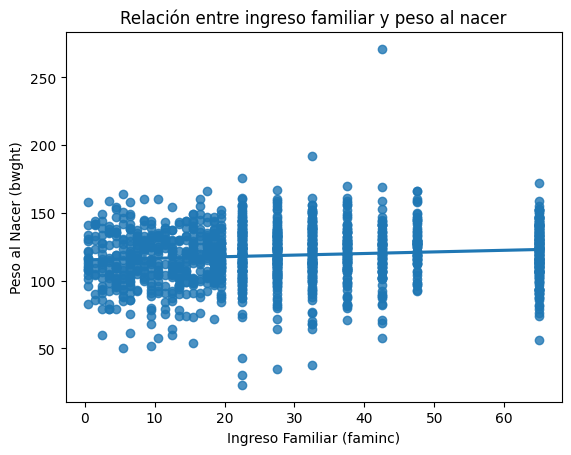

In [ ]:
sns.regplot(data_bwght,x='faminc',y='bwght', ci=None)
# Personalización del gráfico (opcional)
plt.title('Relación entre ingreso familiar y peso al nacer')
plt.xlabel('Ingreso Familiar (faminc)')
plt.ylabel('Peso al Nacer (bwght)')
plt.show()

### Parte II

In [ ]:
# Parte ii: ¿Cree que cigs y faminc estén correlacionados?
# Respuesta:
# Es posible que cigs (consumo de cigarrillos durante el embarazo) y faminc estén
# correlacionados. Una correlación negativa podría esperarse si familias con mayores ingresos
# tienen mayor acceso a información sobre los riesgos de fumar y tienen hábitos más saludables.
# Sin embargo, también podría ser positivo si el acceso al tabaco no está restringido por el nivel
# de ingresos en algunos contextos.

In [ ]:
data_bwght[['faminc','cigs']].corr()

,faminc,cigs
faminc,1.000000,-0.173045
cigs,-0.173045,1.000000


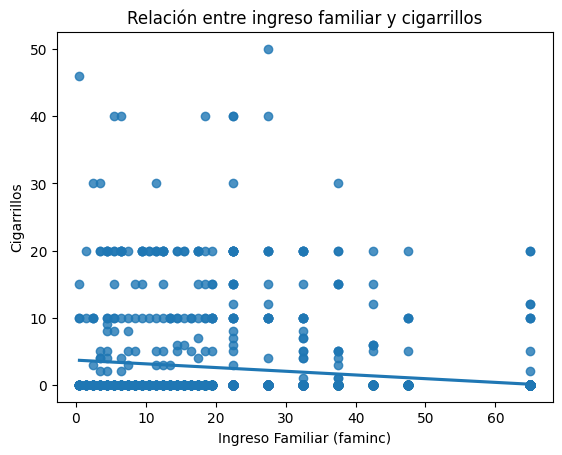

In [ ]:
sns.regplot(data_bwght,x='faminc',y='cigs', ci=None)
# Personalización del gráfico (opcional)
plt.title('Relación entre ingreso familiar y cigarrillos')
plt.xlabel('Ingreso Familiar (faminc)')
plt.ylabel('Cigarrillos')
plt.show()

### Parte III

In [ ]:
# Parte iii: Calcular la ecuación con y sin faminc

# Variables explicativas
X1 = data_bwght['cigs']
X2 = data_bwght[['cigs', 'faminc']]

# Agregar una constante para la intersección
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)

# Variable dependiente
y = data_bwght['bwght']

In [ ]:
# Modelo sin faminc
model1 = sm.OLS(y, X1).fit()

# Modelo con faminc
model2 = sm.OLS(y, X2).fit()

In [ ]:
stargazer = Stargazer([model1, model2])
paises = ['Modelo 1','Modelo 2']
stargazer.custom_columns(paises)
stargazer.title("Modelo de bwght")

html_table = stargazer.render_html()
HTML(html_table)

In [ ]:
# Análisis de resultados:
# Los efectos de cigs varian segun la presencia de de faminc, el R2 mejora singnificativamente.